In [5]:
from pycaret.classification import *
import pandas as pd
import os
import seaborn as sns
import matplotlib.pyplot as plt
os.chdir('/home/antoine/gene_pheno_pred')


In [6]:
# Load training set
train = pd.read_csv('//home/antoine/gene_pheno_pred/models/ComplEx_2023-05-27 20:08:45.227169_kg_train.csv' , header=0)
test = pd.read_csv('/home/antoine/gene_pheno_pred/models/ComplEx_2023-05-27 20:08:45.227169_kg_test.csv' , header=0)

# add column to identify train, test and val
train['set'] = 'train'
test['set'] = 'test'

# Merge train, test and val
df = pd.concat([train, test], axis=0)
df = df[~(df['relation'] == 'no_link_known')] # Drop negatives
df

0         1         2         3         4         5         6  \
0      -0.046983 -0.013739  0.042602  0.048736  0.043750  0.013219  0.036165   
2      -0.062714 -0.046944 -0.003344  0.064870  0.043218  0.050744  0.020802   
3      -0.036769 -0.050530  0.022724  0.043481  0.041065 -0.027905  0.048080   
4      -0.043939 -0.019298  0.032994  0.052776  0.022629  0.040683  0.018780   
5      -0.026500 -0.049129  0.030705  0.040607  0.044516 -0.022275  0.021410   
...          ...       ...       ...       ...       ...       ...       ...   
469365  0.111279  0.089259 -0.094536  0.070284 -0.091275  0.086319 -0.095893   
469367 -0.017618 -0.008766 -0.048096  0.018502  0.004573 -0.004762 -0.050887   
469370 -0.050200 -0.017306  0.034940  0.051345 -0.033794  0.043038  0.013062   
469371 -0.044240 -0.040704 -0.038273  0.039763  0.023383  0.049980 -0.019116   
469373  0.038513 -0.034312 -0.031073 -0.084126 -0.111820  0.053255 -0.018008   

               7         8         9  ...       194       195       196  \
0       0.046175  0.045315 -0.038804  ...  0.037187  0.047306  0.152032   
2       0.065952  0.046233 -0.025984  ...  0.312158 -0.314862 -0.305022   
3       0.047706  0.006531  0.052103  ... -0.197611  0.210941 -0.221397   
4      -0.007267  0.009522  0.015316  ...  0.473943 -0.413582 -0.477105   
5       0.041271  0.034471 -0.039213  ... -0.089732  0.176532 -0.177958   
...          ...       ...       ...  ...       ...       ...       ...   
469365  0.076899 -0.105158  0.111245  ...  0.021843 -0.022982  0.013403   
469367  0.015212 -0.030709  0.002636  ...  0.021843 -0.022982  0.013403   
469370 -0.011356  0.029784 -0.031038  ...  0.012510  0.008696 -0.004696   
469371  0.043720  0.018882 -0.027082  ...  0.008387 -0.005385  0.007089   
469373 -0.102851 -0.072337  0.055077  ...  0.025999  0.001503  0.011267   

             197       198       199  \
0       0.127002 -0.170383 -0.048178   
2       0.301996  0.311502  0.295692   
3       0.177444 -0.183186 -0.175382   
4      -0.485538 -0.480503  0.514484   
5      -0.008136 -0.186448 -0.072193   
...          ...       ...       ...   
469365 -0.001441  0.045997  0.004828   
469367 -0.001441  0.045997  0.004828   
469370 -0.014143  0.029434 -0.018840   
469371 -0.016538  0.009980 -0.008785   
469373 -0.001425  0.026901 -0.022059   

                                                     head  \
0                https://wormbase.org/wbdata/pheno-419244   
2                  https://wormbase.org/wbinter/000550913   
3                 https://wormbase.org/wbdata/pheno-29352   
4                https://wormbase.org/wbdata/pheno-406438   
5                https://wormbase.org/wbdata/pheno-157349   
...                                                   ...   
469365  https://wormbase.org/species/c_elegans/gene/WB...   
469367  https://wormbase.org/species/c_elegans/gene/WB...   
469370             https://wormbase.org/wbinter/000538981   
469371           https://wormbase.org/wbdata/pheno-407861   
469373              https://wormbase.org/wbdata/dev-22150   

                                               relation  \
0           http://www.semanticweb.org/needed-terms#001   
2        http://semanticscience.org/resource/SIO_000628   
3           http://www.semanticweb.org/needed-terms#001   
4        http://semanticscience.org/resource/SIO_001279   
5           http://www.semanticweb.org/needed-terms#001   
...                                                 ...   
469365  http://www.w3.org/1999/02/22-rdf-syntax-ns#type   
469367  http://www.w3.org/1999/02/22-rdf-syntax-ns#type   
469370   http://semanticscience.org/resource/SIO_000628   
469371   http://semanticscience.org/resource/SIO_001279   
469373      http://www.semanticweb.org/needed-terms#004   

                                                     tail    set  
0       https://wormbase.org/species/c_elegans/gene/WB...  train  
2          http://semanticscience.org/resource/SIO_010043  train  
3       https://wormbase.org/

In [9]:
# split combined embeddings into individual nodes
df1 = df.iloc[:, :100] # Head node
df2 = df.iloc[:, 100:200] # Tail node

# Add column to identify head and tail node
df1['node'] = df['head']
df2['node'] = df['tail']
df1['set'] = df['set']
df2['set'] = df['set']

# drop indexes
df1 = df1.reset_index(drop=True)
df2 = df2.reset_index(drop=True)

# rename columns of df2 to be the same as df1
df2.columns = df1.columns

# merge the two dataframes
df = pd.concat([df1, df2], axis=0)

# Count the number of times a node appears in the dataset and add the count as a column
df['connectivity'] = df.groupby('node')['node'].transform('count')
df = df.sample(frac=1)  # Shuffle the DataFrame

# Reset the index of the shuffled DataFrame
df = df.reset_index(drop=True)
df = df.drop_duplicates(subset=['node'])
df

0         1         2         3         4         5         6  \
0        0.488152 -0.485796 -0.528505 -0.557085 -0.496258 -0.515975 -0.478177   
1        0.042302  0.036256 -0.046137  0.027964 -0.035342  0.035771  0.029384   
2        0.152620 -0.123690 -0.160371 -0.131780  0.104793 -0.138482 -0.110596   
3       -0.033806 -0.030565  0.049420  0.044569 -0.038999 -0.038355 -0.052249   
4        0.010983 -0.042625  0.027377  0.039525 -0.046176 -0.033328  0.028145   
...           ...       ...       ...       ...       ...       ...       ...   
2831961 -0.025781  0.012058  0.033951  0.019422  0.009485 -0.017458  0.017218   
2832036 -0.044878  0.031513  0.025460  0.029083  0.013241 -0.006382  0.011698   
2832083 -0.016588  0.029338  0.023196  0.008959  0.027703 -0.002850  0.021197   
2832154 -0.016804 -0.016886  0.020045  0.027947  0.005943 -0.005137 -0.003801   
2832181  0.029949  0.039570  0.040442 -0.006324 -0.037255  0.029007  0.017601   

                7         8         9  ...        93        94        95  \
0       -0.369928 -0.216842 -0.486434  ...  0.349266  0.476863 -0.516907   
1        0.050530 -0.008855 -0.000857  ...  0.046778 -0.014332  0.044435   
2        0.070120 -0.087901  0.015579  ...  0.004336  0.127084  0.101279   
3        0.043973  0.035383  0.035265  ...  0.039241 -0.032635 -0.017556   
4        0.061168 -0.052685  0.060284  ...  0.049851 -0.040607 -0.043681   
...           ...       ...       ...  ...       ...       ...       ...   
2831961  0.017286 -0.002004  0.016568  ... -0.006922  0.024013 -0.000199   
2832036 -0.000756  0.004261  0.040932  ... -0.011427  0.035587 -0.033330   
2832083  0.014118  0.001468 -0.002487  ...  0.002124  0.008079 -0.009003   
2832154  0.005085 -0.010625  0.027928  ...  0.018959  0.024958 -0.006844   
2832181  0.049197 -0.023106 -0.019671  ...  0.041927  0.025500  0.036574   

               96        97        98        99  \
0        0.357032 -0.511963 -0.500753  0.528915   
1        0.035875 -0.032031  0.043326  0.046931   
2        0.198223 -0.114477  0.157230 -0.160378   
3       -0.039134  0.032586  0.046048 -0.047594   
4        0.050520  0.056084  0.057047 -0.052265   
...           ...       ...       ...       ...   
2831961  0.017040 -0.006495  0.025863 -0.027810   
2832036 -0.007697 -0.000256  0.040833 -0.003297   
2832083 -0.012863 -0.016991  0.025055 -0.011168   
2832154  0.015035  0.003711  0.009933  0.005351   
2832181 -0.033041 -0.037624  0.012863  0.013138   

                                                      node    set  \
0        https://wormbase.org/species/all/phenotype/WBP...  train   
1                                                   ceh-33  train   
2        https://wormbase.org/species/all/phenotype/WBP...  train   
3                    https://wormbase.org/wbdata/dev-13002  train   
4                    https://wormbase.org/wbdata/dev-73569  train   
...                                                    ...    ...   
2831961                                         21ur-10220  train   
2832036                                         21ur-10864  train   
2832083                                          21ur-3554  train   
2832154                                            srh-155  train   
2832181                                              srm-4  train   

         connectivity  
0               41635  
1                   1  
2                  44  
3                   3  
4                   3  
...               ...  
2831961             1  
2832036             1  
2832083             1  
2832154             1  
2832181             1  

[675845 rows x 103 columns]

In [10]:
# Select only embeddings
df_tsne_num = df.iloc[:, :100]

# Apply TSNE
import numpy as np
import pandas as pd
# Import TSNE
import matplotlib.pyplot as plt
from sklearn.manifold import TSNE

In [11]:
tsne = TSNE(n_components=2)  # Specify the number of components you want to keep
tsne_result = tsne.fit_transform(df_tsne_num)
df_tsne = pd.DataFrame(data=tsne_result, columns=['TSNE1', 'TSNE2'])

In [12]:
# transform embedding into dataframe
df_tsne.columns = ['TSNE1', 'TSNE2']

df_tsne.reset_index(drop=True, inplace=True)
df.reset_index(drop=True, inplace=True)

df_tsne['node'] = df['node']
df_tsne['set'] = df['set']
df_tsne['connectivity'] = df['connectivity']

# Create a new column with the merged string excluding the last index
df_tsne['node_type'] = df_tsne['node'].apply(lambda x: '/'.join(x[:-1]))
df_tsne['node_type'] = df_tsne['node'].replace('', 'labels')

# Define the ranges and labels for the connectivity groups
ranges = [0, 1, 2, 3, 4, 10, 100, 1000, 10000, float('inf')]
labels = ['1', '2', '3', '4', '5-10', '11-100', '101-1000', '1001-10000', '10001+']

# Create the 'grouped_connectivity' column
df_tsne['grouped_connectivity'] = pd.cut(df_tsne['connectivity'], bins=ranges, labels=labels, right=True)

# Function to replace the column values
def replace_url(url):
    parts = url.split('-')
    if len(parts) > 1:
        url = url.replace('-' + parts[-1], '')
        if 'https' in url:
            return url
        else:
            return ''
    else:
        return '/'.join(url.split('/')[:-1])

# Create a new column with the merged string excluding the last index
df_tsne['node_type'] = df_tsne['node_type'].apply(replace_url)
df_tsne['node_type'] = df_tsne['node_type'].replace('', 'labels')

print(df_tsne['node_type'].unique())

# Define the dictionary mapping
replacement_dict = {
    'https://wormbase.org/wbdata/ortho_dis': 'Ortholog disease',
    'https://wormbase.org/wbdata/pheno': 'Phenotype Annotation',
    'https://wormbase.org/wbinter': 'Interaction Annotation',
    'https://wormbase.org/wbdata/dis': 'Disease Annotation',
    'https://disease': 'Disease',
    'https://wormbase.org/search/life_stage': 'Life Stage',
    'https://wormbase.org/species/c_elegans/gene': 'Molecular Entity',
    'https://wormbase.org/species/all/phenotype': 'Phenotype',
    'https://wormbase.org/wbdata/dev': 'Development Annotation',

    'http://semanticscience.org/resource': 'Mol. Entity Type',
    'https://wormbase.org/species/all/expr_pattern': 'Expression Pattern',

    'labels': 'Labels'
}

# Replace instances in 'node_type' column
df_tsne['node_type'] = df_tsne['node_type'].replace(replacement_dict)

df_tsne = df_tsne.sample(frac=1)  # Shuffle the DataFrame

# Reset the index of the shuffled DataFrame
df_tsne = df_tsne.reset_index(drop=True)

grouped = df_tsne.groupby('set')

df_tsne

['https://wormbase.org/species/all/phenotype' 'labels'
 'https://wormbase.org/wbdata/dev' 'https://wormbase.org/wbdata/pheno'
 'https://wormbase.org/wbinter'
 'https://wormbase.org/species/c_elegans/gene'
 'http://semanticscience.org/resource' 'https://disease'
 'https://wormbase.org/search/life_stage'
 'https://wormbase.org/species/all/expr_pattern'
 'https://wormbase.org/wbdata/ortho_dis' 'https://wormbase.org/wbdata/dis']


TSNE1       TSNE2  \
0       13.631185  104.237900   
1        1.759539  -62.149845   
2       17.153036   70.982826   
3      -73.342949  -32.875298   
4      -13.066987   64.677231   
...           ...         ...   
675840 -83.282791  -53.291378   
675841  49.163895  -92.985939   
675842  61.747665  -32.939960   
675843  45.725601  -82.398521   
675844 -70.093643   75.917717   

                                                     node    set  \
0       https://wormbase.org/species/c_elegans/gene/WB...  train   
1                https://wormbase.org/wbdata/pheno-251541  train   
2                                                   tat-3  train   
3                  https://wormbase.org/wbinter/000516578  train   
4                https://wormbase.org/wbdata/pheno-244903  train   
...                                                   ...    ...   
675840             https://wormbase.org/wbinter/000507676  train   
675841           https://wormbase.org/wbdata/pheno-111163  train   
675842           https://wormbase.org/wbdata/pheno-271902  train   
675843           https://wormbase.org/wbdata/pheno-129435  train   
675844              https://wormbase.org/wbdata/dev-49415  train   

        connectivity               node_type grouped_connectivity  
0                  2        Molecular Entity                    2  
1                  2    Phenotype Annotation                    2  
2                  1                  Labels                    1  
3                  3  Interaction Annotation                    3  
4                  2    Phenotype Annotation                    2  
...              ...                     ...                  ...  
675840             3  Interaction Annotation                    3  
675841             2    Phenotype Annotation                    2  
675842             2    Phenotype Annotation                    2  
675843             2    Phenotype Annotation                    2  
675844             3  Development Annotation                    3  

[675845 rows x 7 columns]

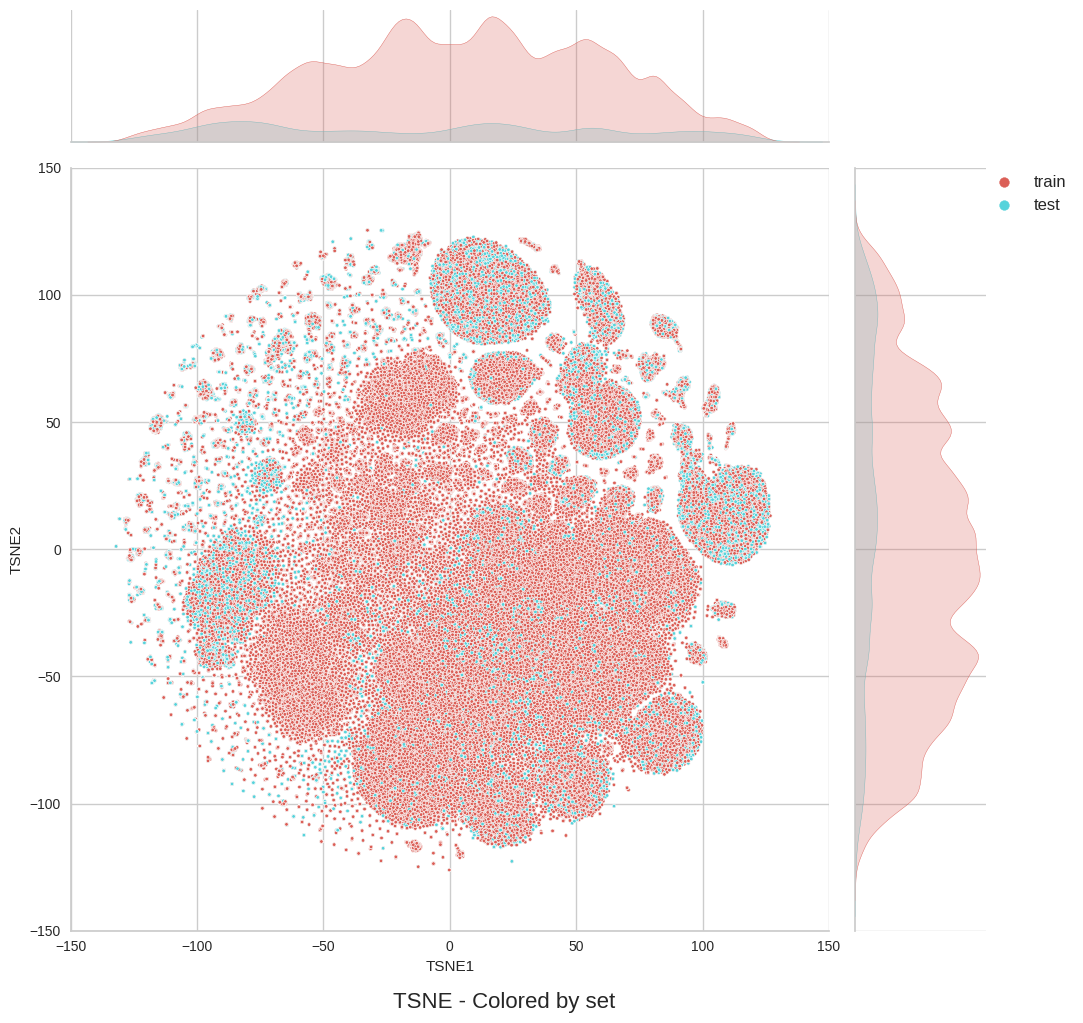

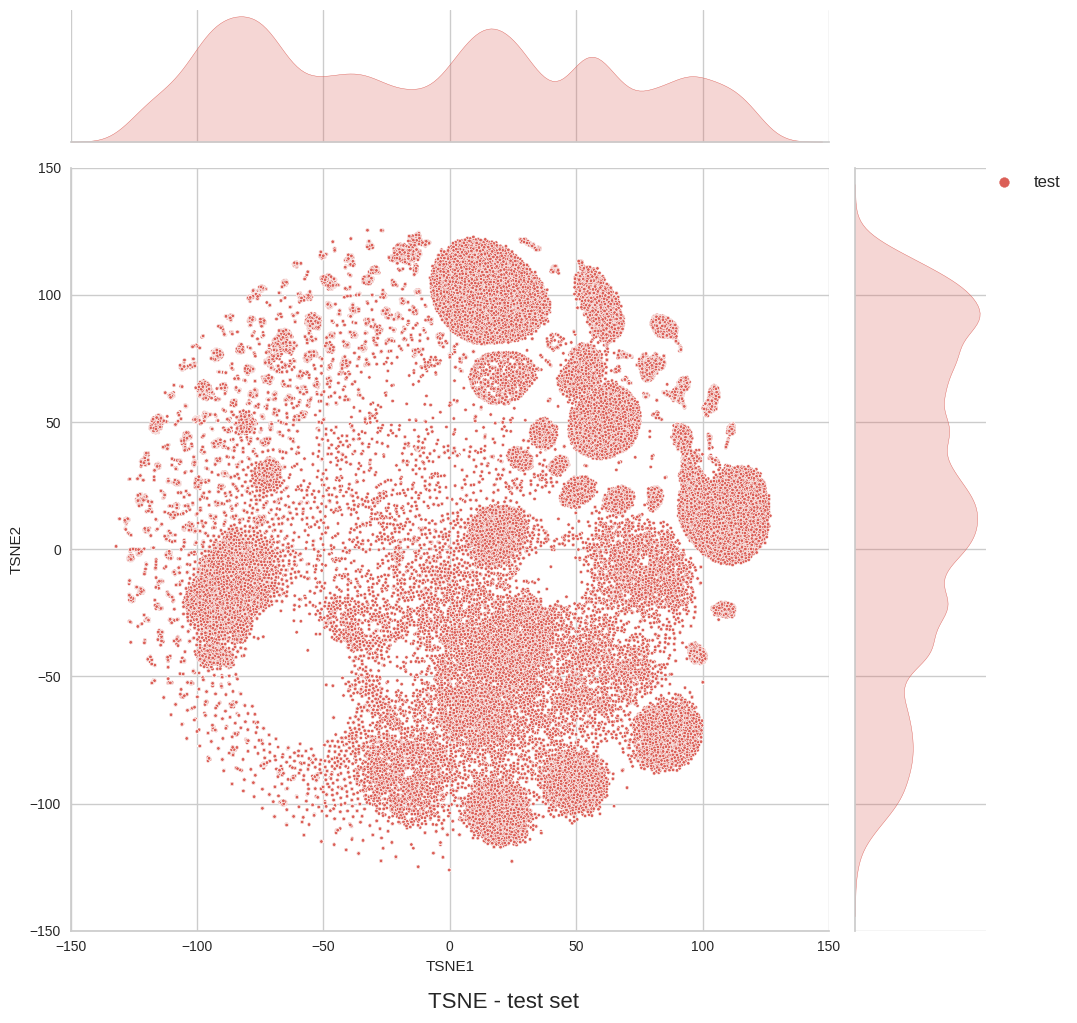

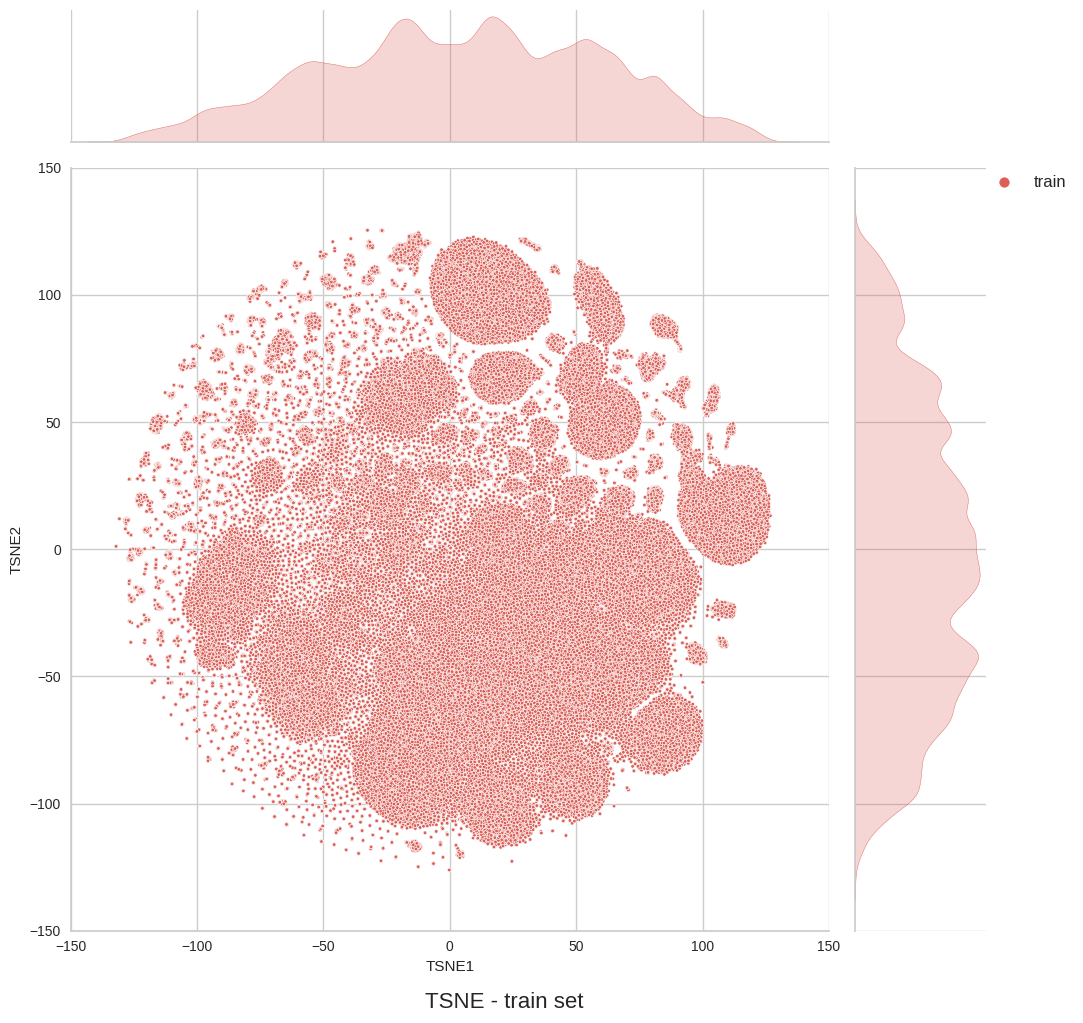

In [13]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Set xlim and ylim
g.ax_joint.set_xlim(-150, 150)
g.ax_joint.set_ylim(-150, 150)

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
g.fig.suptitle('TSNE - Colored by set', y=0.0, fontsize=16)
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='set', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Set xlim and ylim
    g.ax_joint.set_xlim(-150, 150)
    g.ax_joint.set_ylim(-150, 150)
    
    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
    g.fig.suptitle('TSNE - ' + group_name + ' set', y=0.0, fontsize=16)

    plt.show()

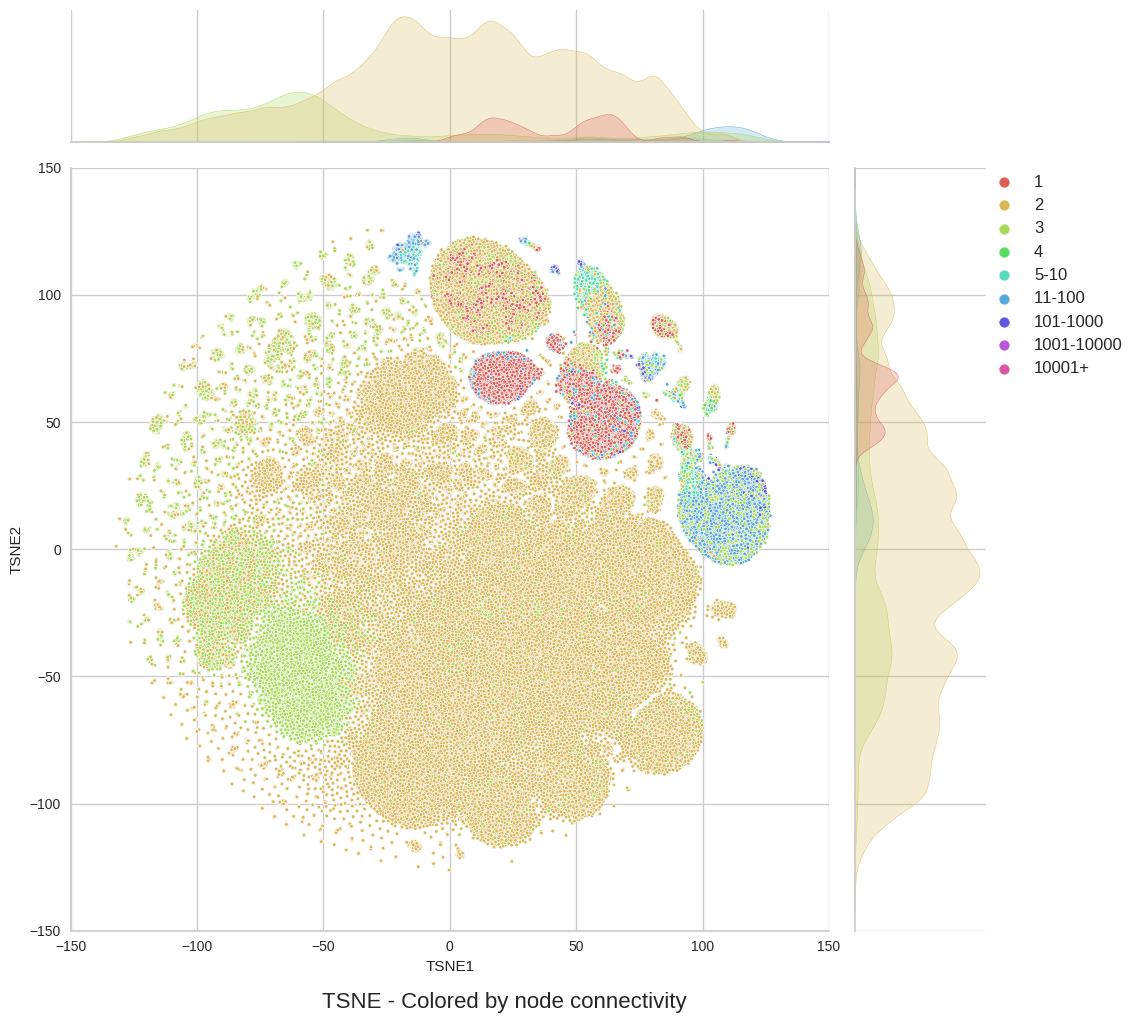

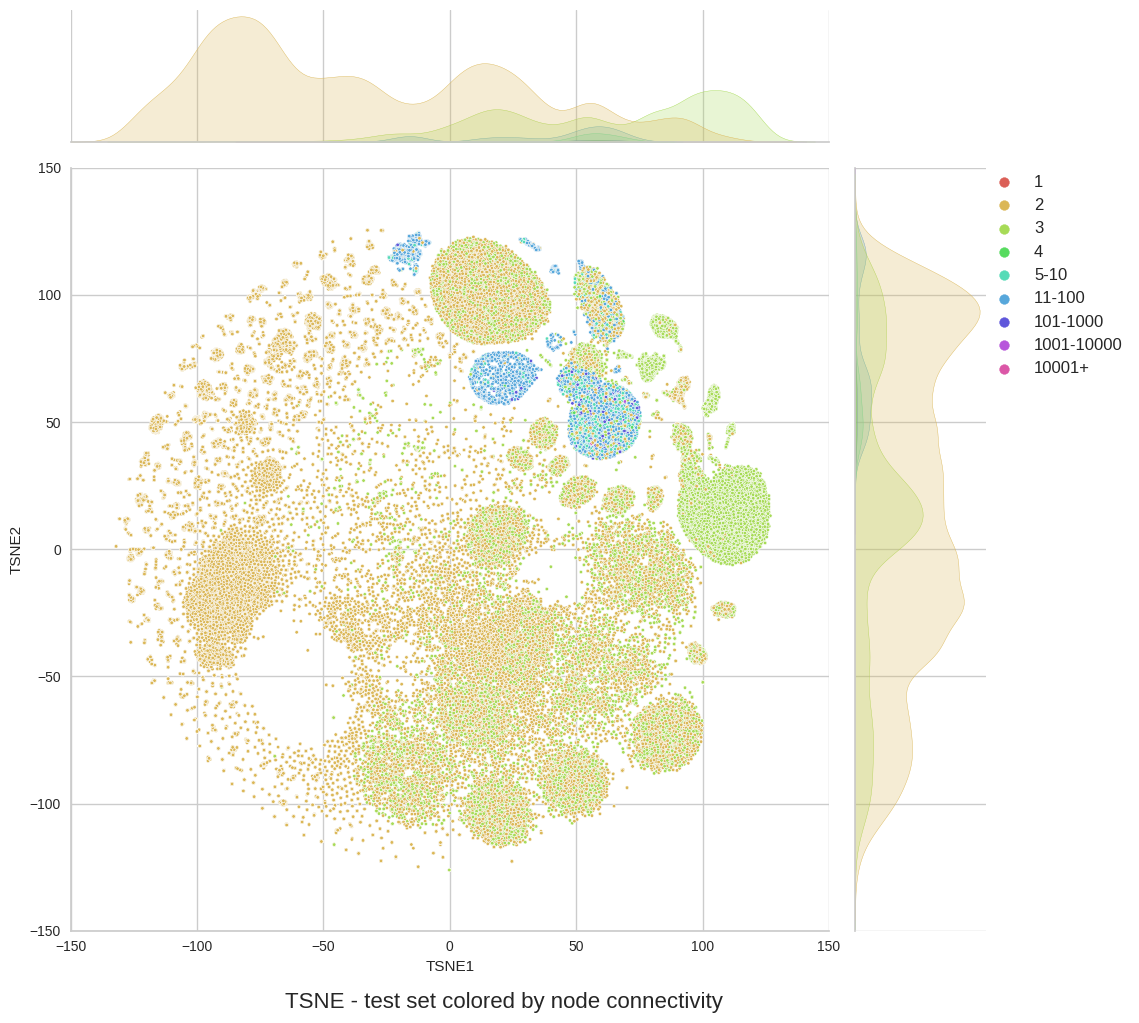

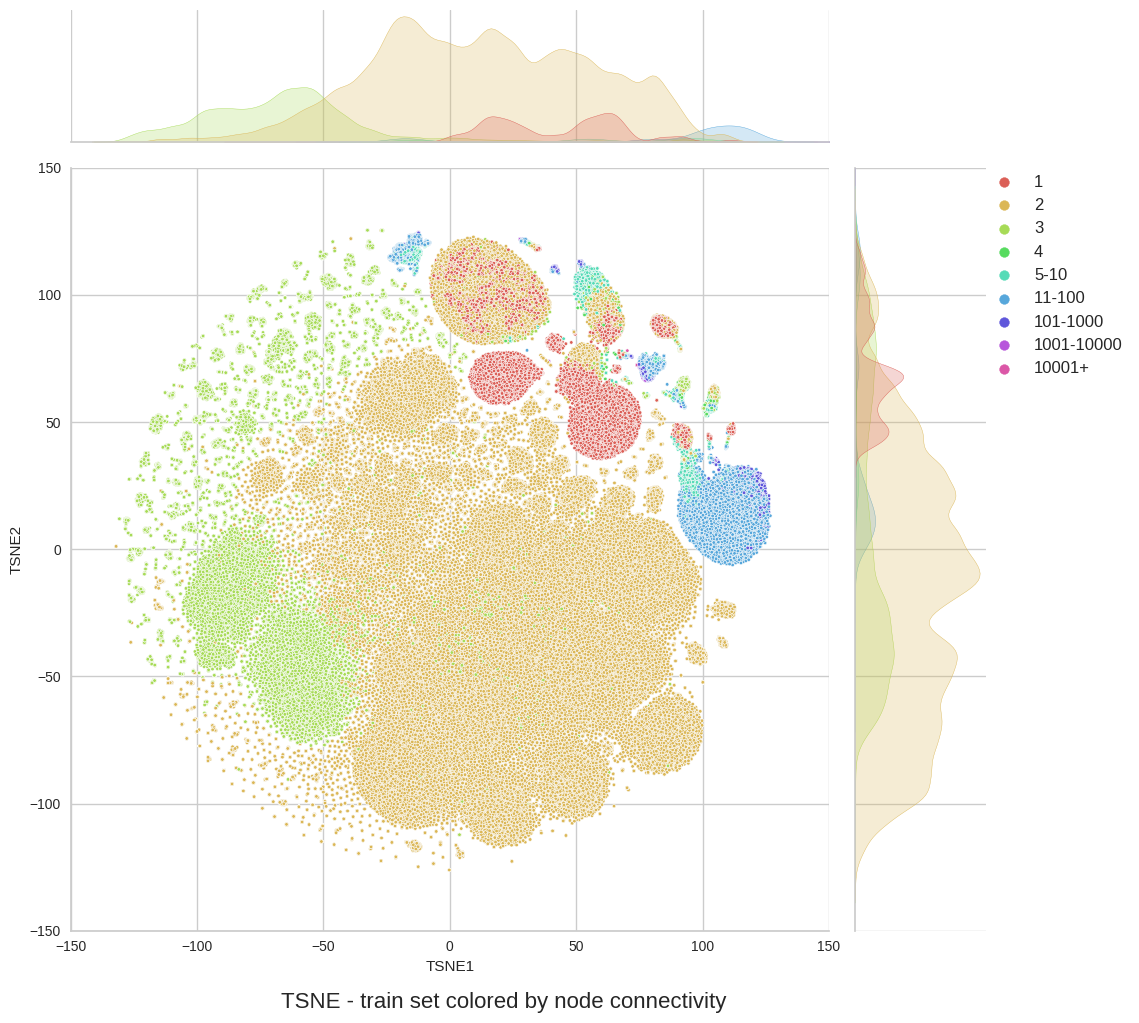

In [14]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='grouped_connectivity', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Set xlim and ylim
g.ax_joint.set_xlim(-150, 150)
g.ax_joint.set_ylim(-150, 150)

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
g.fig.suptitle('TSNE - Colored by node connectivity', y=0.0, fontsize=16)
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='grouped_connectivity', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Set xlim and ylim
    g.ax_joint.set_xlim(-150, 150)
    g.ax_joint.set_ylim(-150, 150)
    
    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
    g.fig.suptitle('TSNE - ' + group_name + ' set colored by node connectivity', y=0.0, fontsize=16)

    plt.show()

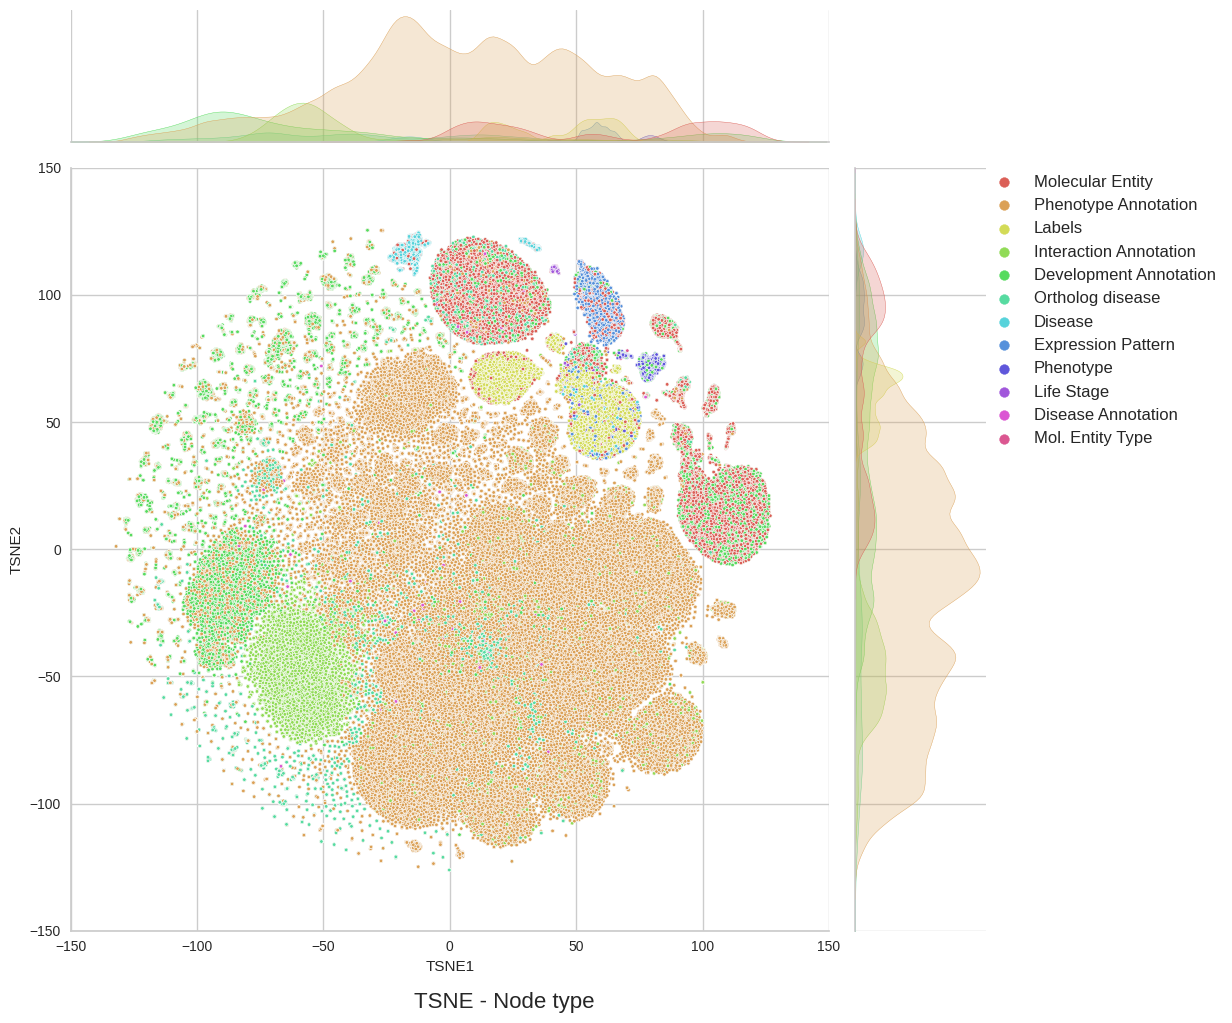

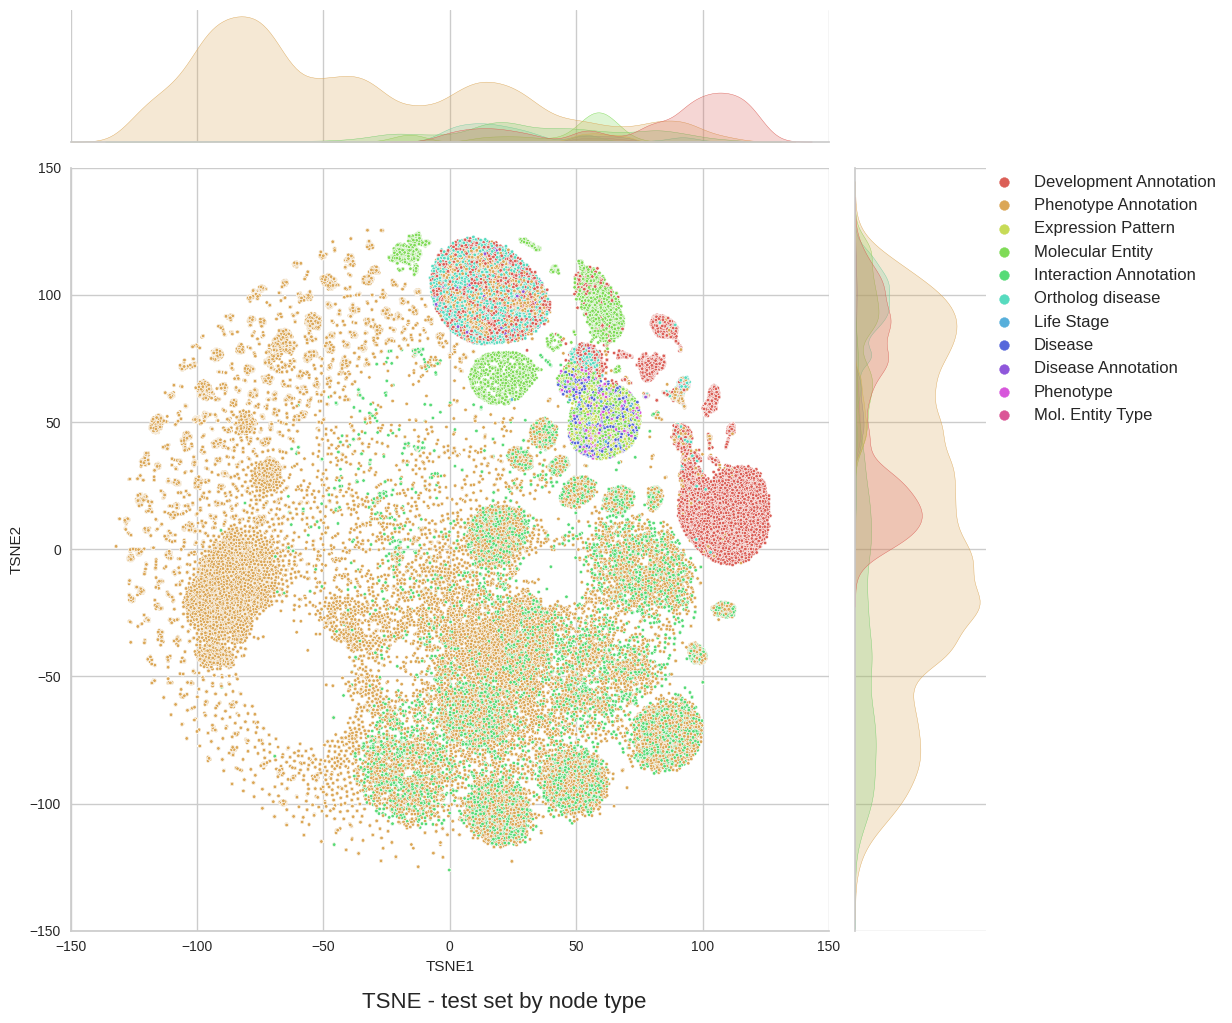

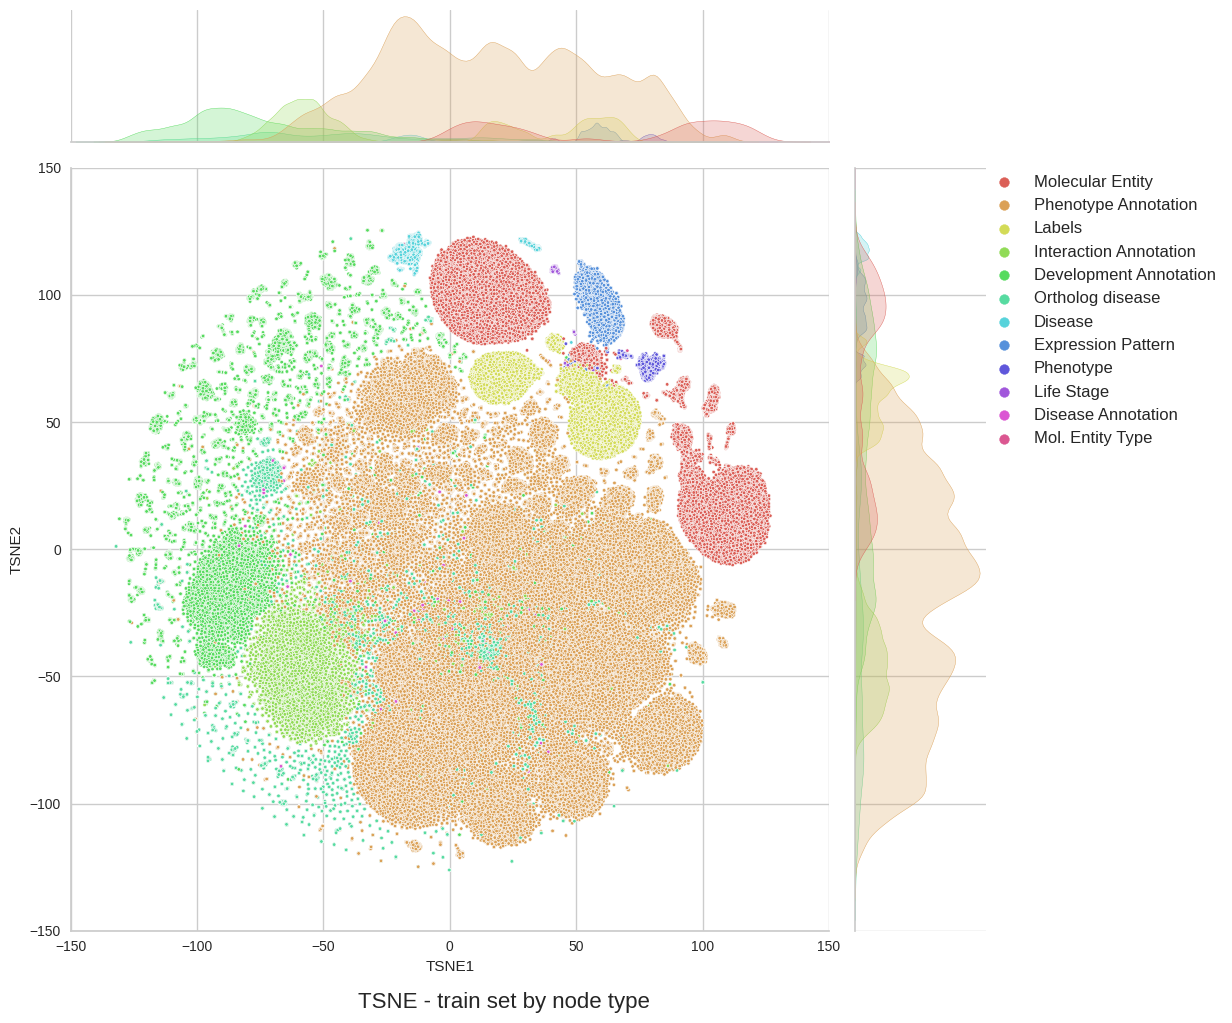

In [15]:
g = sns.jointplot(data=df_tsne, x='TSNE1', y='TSNE2', hue='node_type', palette='hls', height=10, ratio=5, marker=".", s=25)
g.set_axis_labels('TSNE1', 'TSNE2')

# Set xlim and ylim
g.ax_joint.set_xlim(-150, 150)
g.ax_joint.set_ylim(-150, 150)

# Legend outside the plot
plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
g.fig.suptitle('TSNE - Node type', y=0.0, fontsize=16)
plt.show()

# Access each group separately
for group_name, group_data in grouped:
    g = sns.jointplot(data=group_data, x='TSNE1', y='TSNE2', hue='node_type', palette='hls', height=10, ratio=5, marker=".", s=25)
    g.set_axis_labels('TSNE1', 'TSNE2')

    # Set xlim and ylim
    g.ax_joint.set_xlim(-150, 150)
    g.ax_joint.set_ylim(-150, 150)
    
    # Legend outside the plot
    plt.legend(bbox_to_anchor=(1.2, 1), loc=2, borderaxespad=0., prop={'size': 12})
    g.fig.suptitle('TSNE - ' + group_name + ' set by node type', y=0.0, fontsize=16)

    plt.show()

In [16]:
for group_name, group_data in grouped:
    print(group_data['node_type'].value_counts())



Phenotype Annotation      69208
Development Annotation    14017
Interaction Annotation     8826
Molecular Entity           4670
Ortholog disease           4489
Expression Pattern         1004
Disease                     752
Phenotype                   457
Disease Annotation          188
Life Stage                   98
Mol. Entity Type              2
Name: node_type, dtype: int64
Phenotype Annotation      363671
Development Annotation     60141
Molecular Entity           44519
Interaction Annotation     37940
Labels                     28694
Ortholog disease           24010
Expression Pattern          6392
Disease                     3467
Phenotype                   1951
Disease Annotation           883
Life Stage                   456
Mol. Entity Type              10
Name: node_type, dtype: int64
